In [1]:
import numpy as np
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Define the quadratic function
def quadratic_function(x):
    return x**2+x+2

# Define the gradient of the quadratic function
def gradient(x):
    return 2*x+1


In [3]:
x_initial = 7
y_intial = quadratic_function(x_initial)
learning_rate = 0.9

In [4]:
def gradient_descent(gradient, learning_rate, num_iterations, x_initial):
    # Initialize the starting point
    y_initial = quadratic_function(x_initial)
    
    # Initialize the lists to store the journey of gradient descent
    x_journey = [x_initial]
    y_journey = [y_initial]
    
    # Perform gradient descent
    for i in range(num_iterations):
        x_new = x_journey[-1] - learning_rate * gradient(x_journey[-1])
        y_new = quadratic_function(x_new)
        x_journey.append(x_new)
        y_journey.append(y_new)
    
    return x_journey, y_journey


In [5]:
def gradient_descent_with_momentum(gradient, learning_rate, momentum, num_iterations, x_initial):
    # Initialize the starting point
    y_initial = quadratic_function(x_initial)
    
    # Initialize the lists to store the journey of gradient descent
    x_journey = [x_initial]
    y_journey = [y_initial]
    
    # Initialize the velocity
    velocity = 0
    
    # Perform gradient descent with momentum
    for i in range(num_iterations):
        gradient_value = gradient(x_journey[-1])
        velocity = momentum * velocity - learning_rate * gradient_value
        
        x_new = x_journey[-1] + velocity
        y_new = quadratic_function(x_new)
        x_journey.append(x_new)
        y_journey.append(y_new)
    
    return x_journey, y_journey


In [6]:
x_initial = 20
learning_rate = 0.8
num_iterations = 3
momentum = 0.2

/var/folders/gx/rjvt3w81017_cp1lyj8sxr480000gn/T/ipykernel_33992/794885836.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(x_journey, y_journey, 'bo-', label='Gradient Descent Momentum Journey', color="green")


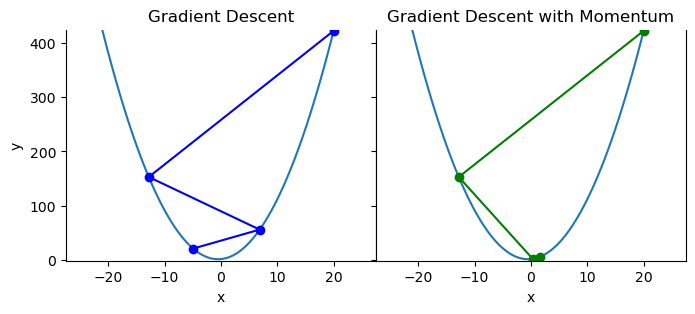

In [8]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3), sharex=True, sharey=True, frameon=False)

# Plot the quadratic function in both subplots
x = np.linspace(- x_initial -5, x_initial +5, 100)
y = quadratic_function(x)
ax1.plot(x, y, label='Quadratic Function')
ax2.plot(x, y, label='Quadratic Function')

# Plot the journey of gradient descent without momentum in the first subplot
x_journey, y_journey = gradient_descent(gradient, learning_rate, num_iterations, x_initial )
ax1.plot(x_journey, y_journey, 'bo-', label='Gradient Descent Journey')

# Plot the journey of gradient descent with momentum in the second subplot
x_journey, y_journey = gradient_descent_with_momentum(gradient, learning_rate, momentum, num_iterations, x_initial)
ax2.plot(x_journey, y_journey, 'bo-', label='Gradient Descent Momentum Journey', color="green")


# Set the labels and title for both subplots
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Gradient Descent')
ax1.spines['top'].set_visible(False)


ax2.set_xlabel('x')
ax2.set_title('Gradient Descent with Momentum')
ax2.spines['top'].set_visible(False)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.0)

# Show the plot
ax1.set_ylim(-1, quadratic_function(x_initial)+2)
ax2.set_ylim(-1, quadratic_function(x_initial)+2)

plt.savefig("/Users/ollerehnfeldt/Desktop/ADAM-Optimizer/report/figures/gradient_descent_with_momentum.pdf")
plt.show()

In [ ]:
# WORK IN PROGRESS
  # gradient descent with adaptive learning rate
def gradient_descent_adaptive(gradient, learning_rate, num_iterations, x_initial):
    # Initialize the starting point
    y_initial = quadratic_function(x_initial)
    
    # Initialize the lists to store the journey of gradient descent
    x_journey = [x_initial]
    y_journey = [y_initial]

    # Initialize the velocity
    velocity = 0

    # Perform gradient descent with adaptive learning rate
    for _ in range(num_iterations):
        gradient_value = gradient(x_journey[-1])
        velocity = momentum * velocity - learning_rate * gradient_value**2

        x_new = x_journey[-1] + velocity
        y_new = quadratic_function(x_new)
        x_journey.append(x_new)
        y_journey.append(y_new)
    
    return x_journey, y_journey
    
